In [1]:
import ipywidgets as widgets
import utils
import os
from importlib import reload

reload(utils)

<module 'utils' from 'c:\\github\\dog_brain_toolkit\\utils.py'>

In [25]:
reload(utils)
dataset = 'Complex'
session = ''
task = 'visual' 
specie= 'D'
datafolder = 'C:\data'
datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'
sub_N = 1
run_N = 1


smooth = 0 # usually 0 at this point


# path to design.fsf, current directory followed by design.fsf
design_path = os.path.join(os.getcwd(), 'FSL_designs' + os.sep + 'preprocess.fsf')

## determine input file and output directory ## 

# input directory in BIDS format
filename = datafolder + os.sep + dataset + os.sep + 'BIDS' + os.sep + specie + '-sub-' + str(sub_N).zfill(3) + os.sep + 'func' + os.sep
# check if session is not empty
if session != '':
    filename += 'ses-' + session + os.sep
filename += specie + '-sub-' + str(sub_N).zfill(3)
if session != '':
    filename += '_ses-' + session
filename += '_task-' + task + '_run-' + str(run_N).zfill(2) + '_bold.nii.gz'

# get TR and number of volumes
TR,volumes = utils.extract_params(filename)

# create output directory, where the fsl output will be saved (preprocessed data)
outputdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3) + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# check if session is not empty
if session != '':
    outputdir += '_ses-' + session
outputdir += '_task-' + task + '_run-' + str(run_N).zfill(2)

## Filling out the design.fsf file ##
# create list of labels to fill in the design.fsf file
label_list = ['Outputdir', 'TR', 'Volumes', 'BET', 'Smooth', 'Input']

# create dictionary to fill in the design.fsf file
to_fill_dict = dict()
for label in label_list:
    to_fill_dict[label] = dict()
    if label == 'Outputdir':
        to_fill_dict[label]['string_to_find'] = 'set fmri(outputdir)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(outputdir) "' + outputdir + '"')
    elif label == 'TR':
        to_fill_dict[label]['string_to_find'] = 'set fmri(tr)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(tr) ' + str(TR))
    elif label == 'Volumes':
        to_fill_dict[label]['string_to_find'] = 'set fmri(npts)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(npts) ' + str(volumes))
    elif label == 'BET':
        to_fill_dict[label]['string_to_find'] = 'set fmri(bet_yn)'
        if specie == 'H':
            to_fill_dict[label]['string_to_replace'] = ('set fmri(bet_yn) 1')
        elif specie == 'D':
            to_fill_dict[label]['string_to_replace'] = ('set fmri(bet_yn) 0')
    elif label == 'Smooth':
        to_fill_dict[label]['string_to_find'] = 'set fmri(smooth)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(smooth) ' + str(smooth))
    elif label == 'Input':
        to_fill_dict[label]['string_to_find'] = 'set feat_files(1)'
        to_fill_dict[label]['string_to_replace'] = ('set feat_files(1) "' + filename + '"')

# indicate the outputdir
print('Output directory: ' + outputdir)

This is a test, no actual fslinfo command will be run, giving back random values
Output directory: /home/raulh87/mnt/a471/userdata/raulh87/data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01


In [6]:
design_path = os.path.join(os.getcwd(), 'FSL_designs'  + os.sep + 'preprocess.fsf')
design_modified_path = os.path.join(os.getcwd(), 'FSL_designs'  + os.sep + 'preprocess_modified.fsf')

utils.fill_fsf(to_fill_dict, design_path, design_modified_path)

# run feat
os.system('feat ' + design_modified_path)


{'string_to_find': 'set feat_files(1)',
 'string_to_replace': 'set feat_files(1) "/home/raulh87/mnt/a471/userdata/raulh87/data\\Complex\\BIDS\\D-sub-001\\func\\D-sub-001_task-visual_run-01_bold.nii.gz"'}

In [22]:
import shutil

In [41]:
reload(utils)
dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
datafolder = r"P:\userdata\raulh87\data"
#datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'
sub_N = 1
run_N = 1

# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# generate base filename
base_filename = specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    base_filename += '_ses-' + session
base_filename += '_task-' + task + '_run-' + str(run_N).zfill(2)

preprocessed_file = base_filename + '.feat' + os.sep + 'filtered_func_data.nii.gz'
print(preprocessed_file)

# non-oriented file
non_oriented_file = base_filename + '_not-oriented.nii.gz'
# oriented file
reoriented_file = base_filename + '_reoriented.nii.gz'

#copy preprocessed_file to non_oriented_file
#shutil.copyfile(workingdir + os.sep + preprocessed_file, workingdir + os.sep + non_oriented_file)
print(non_oriented_file + ' created')
print('Working directory: ' + workingdir)



D-sub-001_task-visual_run-01.feat\filtered_func_data.nii.gz
D-sub-001_task-visual_run-01_not-oriented.nii.gz created
Working directory: P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001


In [ ]:
combination = ['-x','-y','-z'] # voice_sens
combination = ['-x','z','-y'] # prosody, complex, actions
utils.reorient_file(workingdir + os.sep + non_oriented_file, workingdir + os.sep + reoriented_file, combination)


## Calculating mean_fct

In [76]:

#print(base_filename)
first_time = True # flag to create the base volume, True = get the volume, False = do not get the volume it's already created
runs_to_use = [1,2,3,4]
base_run = 1 # run used as reference to align all the others

# movement directory
movementdir = datafolder + os.sep + dataset + os.sep + 'movement'
# create movement directory if it does not exist
if not os.path.exists(movementdir):
    os.makedirs(movementdir)

## obtain volume to be used as base to correct all others ##
filename = specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    filename += '_ses-' + session
filename += '_task-' + task + '_run-' + str(base_run).zfill(2) + '_reoriented.nii.gz'

if first_time: # get the volume
    # get the first volume of the first run to use as base volume
    command = f"fslroi {workingdir + os.sep + filename} {workingdir + os.sep + 'base_vol.nii.gz'} 0 1"
    os.system(command)
    first_time = False
else:
    # check if base_vol exists
    if not os.path.exists(workingdir + os.sep + 'base_vol.nii.gz'):
        print('base_vol.nii.gz does not exist, run the code with first_time = True')
        raise ValueError('base_vol.nii.gz does not exist, run the code with first_time = True')
## ----- ##

# This string will be used to generate the mean image
mean_images = ''

## calculate motion for each run and generate par file ##
for n,run_N in enumerate(runs_to_use):
    print('processing ' + str(n+1) + ' of ' + str(len(runs_to_use)))
    filename = specie + '-sub-' + str(sub_N).zfill(3)
    # adding session if there is one
    if session != '':
        filename += '_ses-' + session
    filename += '_task-' + task + '_run-' + str(run_N).zfill(2) + '_reoriented.nii.gz'
    # calculate motion and generate par file
    print('calculating motion...')
    
    command = f"mcflirt -in {workingdir + os.sep + filename} -out {workingdir + os.sep + filename[:-7] + '_mc_tmp.nii.gz'} -plots"
    os.system(command)
    # rename par file
    os.rename(workingdir + os.sep + filename[:-7] + '_mc_tmp.nii.gz.par', movementdir + os.sep + filename[:-18] + '.par')
    print('par file saved as ' + filename[:-18] + '.par')
    
    print('correcting motion...')
    # motion correct the file to the base_vol
    command = f"mcflirt -in {workingdir + os.sep + filename} -out {workingdir + os.sep + filename[:-7] + '_mc.nii.gz'} -reffile {workingdir + os.sep + 'base_vol.nii.gz'}"
    os.system(command)
    # remove temporary file
    os.remove(workingdir + os.sep + filename[:-7] + '_mc_tmp.nii.gz')
    # calculate mean image
    print('calculating mean image...')
    command = f"fslmaths {workingdir + os.sep + filename[:-7] + '_mc.nii.gz'} -Tmean {workingdir + os.sep + filename[:-18] + '_mean.nii.gz'}"
    os.system(command)
    # add filename to mean_images
    mean_images += workingdir + os.sep + filename[:-18] + '_mean.nii.gz' + ' '

if first_time: # if yes, calculate mean image
    mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
    # adding session if there is one
    if session != '':
        mean_fct_file += '_ses-' + session
    mean_fct_file += '_task-' + task + '_mean_fct.nii.gz'

    # append mean images to a single 4D image
    command = f"fslmerge -t {mean_fct_file} {mean_images}"
    os.system(command)
    print('mean fct file saved as ' + mean_fct_file)

    # calculate mean image
    command = f"fslmaths {mean_fct_file} -Tmean {mean_fct_file}"
    os.system(command)

print('done')

D-sub-001_task-visual_run-01
D-sub-001_task-visual_run-02
D-sub-001_task-visual_run-03
D-sub-001_task-visual_run-04


## BET

In [6]:
from ipywidgets import HBox, VBox
import numpy as np
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets

C:\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_mean_fct.nii.gz



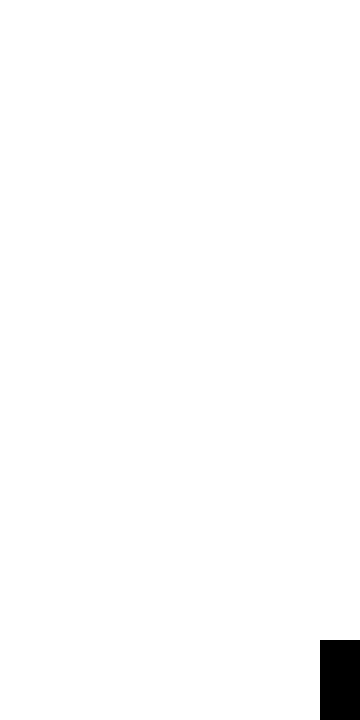
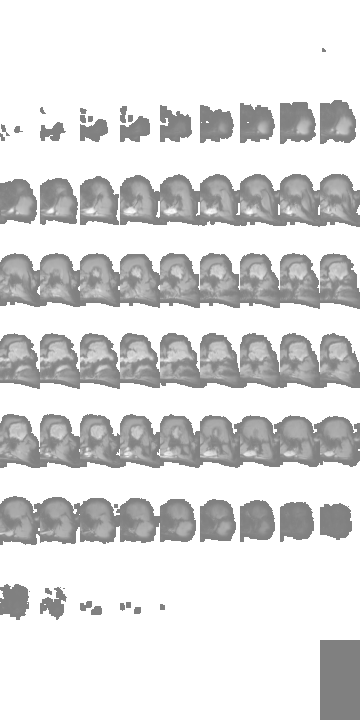

In [3]:
from nilearn import plotting
from nilearn import image as nli
reload(utils)
dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
datafolder = r"P:\userdata\raulh87\data"
datafolder = r"C:\data"
#datafolder = '/home/raulh87/mnt/a471/userdata/raulh87/data'
sub_N = 1



# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
mean_fct_file += '_task-' + task + '_mean_fct.nii.gz'

print(mean_fct_file)

# load reoriented file
img = nli.mean_img(mean_fct_file)
# plot reoriented file
plotting.view_img(img, bg_img=False, cmap='gray', colorbar=False, annotate=True)


In [23]:
import nibabel as nib
import matplotlib.pyplot as plt

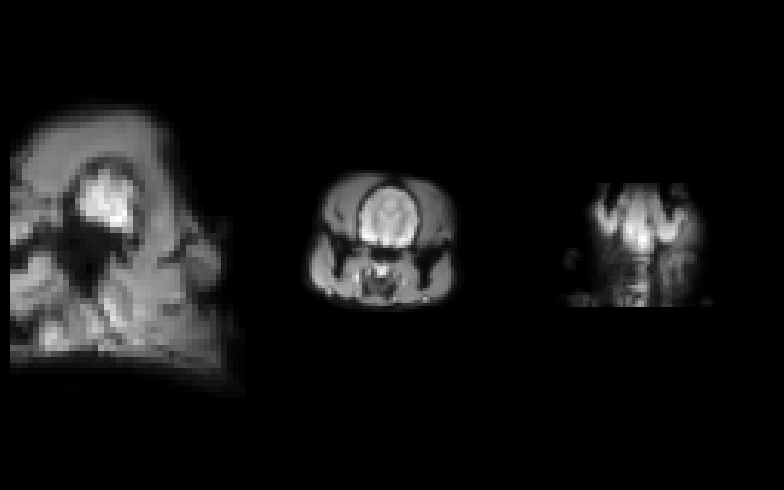

In [33]:


# Load your NIfTI file




def plot_slices(mean_fct_file, x, y, z):
    img = nib.load(mean_fct_file)

    # Get the data from the image
    data = img.get_fdata()

    """
    Plot slices from the sagittal, coronal, and axial views side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(8, 5))

    # Sagittal
    sagittal_slice = data[x, :, :]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].axis('off')

    # Coronal
    coronal_slice = data[:, y, :]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].axis('off')

    # Axial
    axial_slice = data[:, :, x]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].axis('off')

    # make a tight layout
    plt.tight_layout()

    # make the background black
    fig.patch.set_facecolor('black')

    plt.show()

# Example usage: Plot the 30th sagittal, 50th coronal, and 40th axial slices
plot_slices(30, 20, 20)



# BET app

In [2]:
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import utils
import os
from importlib import reload
from nilearn import plotting
from nilearn import image as nli
reload(utils)
import nibabel as nib
import numpy as np
from ipywidgets import HBox, VBox
import numpy as np
from nilearn.plotting import plot_anat, show
import ipywidgets as widgets
import matplotlib.pyplot as plt

#plot_anat(mean_fct_file, display_mode='ortho', cut_coords=[x,y,z])


In [4]:
def plot_slices(x, y, z, x_lim1, y_lim1, z_lim1, x_lim2, y_lim2, z_lim2):
    
    """
    Plot slices from the sagittal, coronal, and axial views side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(8, 5))

    # Sagittal
    sagittal_slice = data[x, :, :]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].axis('off')

    # Coronal
    coronal_slice = data[:, y, :]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].axis('off')

    # Axial
    axial_slice = data[:, :, z]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].axis('off')

    # make a tight layout
    plt.tight_layout()

    # make the background black
    fig.patch.set_facecolor('black')

    
    # Plotting red lines
    # plotting lines in sagital slice
    axes[0].axhline(y=z_lim1, color='red', lw=2)
    axes[0].axvline(x=y_lim1, color='red', lw=2)

    # plotting lines in coronal slice
    axes[1].axvline(x=x_lim1, color='red', lw=2)
    axes[1].axhline(y=z_lim1, color='red', lw=2)
    
    # plotting lines in axial slice
    axes[2].axvline(x=x_lim1, color='red', lw=2)
    axes[2].axhline(y=y_lim1, color='red', lw=2)

    # Plotting blue lines
    # plotting lines in sagital slice
    axes[0].axhline(y=z_lim2, color='blue', lw=2)
    axes[0].axvline(x=y_lim2, color='blue', lw=2)

    # plotting lines in coronal slice
    axes[1].axvline(x=x_lim2, color='blue', lw=2)
    axes[1].axhline(y=z_lim2, color='blue', lw=2)

    # plotting lines in axial slice
    axes[2].axvline(x=x_lim2, color='blue', lw=2)
    axes[2].axhline(y=y_lim2, color='blue', lw=2)
    
    


    plt.show()

    # button to cut file is pressed, then it runs remSlices.sh using the selected limits
    #if cut_file:
    #    !bash 'remSlices.sh ' + mean_fct_file test.nii.gz + str(x_lim1) + ' ' + str(y_lim1) + ' ' + str(z_lim1) + ' ' + str(x_lim2) + ' ' + str(y_lim2) + ' ' + str(z_lim2)
        # run remSlices.sh
        #'!remSlices.sh ' + mean_fct_file + str(x_lim1) + ' ' + str(y_lim1) + ' ' + str(z_lim1) + ' ' + str(x_lim2) + ' ' + str(y_lim2) + ' ' + str(z_lim2)
        # reload the image
        

def button_pressed(x_lim1, y_lim1, z_lim1, x_lim2, y_lim2, z_lim2):
    print('button pressed')
    command = f"remSlices.sh {mean_fct_file} {cut_mean_fct_file} {x_lim1} {y_lim1} {z_lim1} {x_lim2} {y_lim2} {z_lim2}"
    os.system(command)
    #!bash 'remSlices.sh ' + mean_fct_file + ' ' + cut_mean_fct_file + str(x_lim1) + ' ' + str(y_lim1) + ' ' + str(z_lim1) + ' ' + str(x_lim2) + ' ' + str(y_lim2) + ' ' + str(z_lim2)
    

dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
datafolder = r"C:\data"
sub_N = 1

# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
cut_mean_fct_file = mean_fct_file + '_task-' + task + '_mean_fct_cut.nii.gz'
mean_fct_file += '_task-' + task + '_mean_fct.nii.gz'


# determine min and max values for each axis
img = nib.load(mean_fct_file)

# Get the data from the image
data = img.get_fdata()

maxX,maxY,maxZ = img.shape
col1 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=np.round(maxY/2), description='Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=np.round(maxZ/2), description='Z')])

col2 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=0, description='lim X'),
                     widgets.IntSlider(min=0, max=maxY, step=1, value=0, description='lim Y'),
                     widgets.IntSlider(min=0, max=maxZ, step=1, value=0, description='lim Z')])

col3 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=maxX, description='lim X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=maxY, description='lim Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=maxZ, description='lim Z')])

col4 = widgets.Button(description='Cut file')

out = widgets.interactive_output(plot_slices, {'x':col1.children[0], 'y':col1.children[1], 'z':col1.children[2],
                                                'x_lim1':col2.children[0], 'y_lim1':col2.children[1], 'z_lim1':col2.children[2],
                                                'x_lim2':col3.children[0], 'y_lim2':col3.children[1], 'z_lim2':col3.children[2],
                                                })


# setting the button to call the function
col4.on_click(lambda b: button_pressed(
    col2.children[0].value, col2.children[1].value, col2.children[2].value,
    col3.children[0].value, col3.children[1].value, col3.children[2].value,
))

display(HBox([col1,col2,col3,col4]),out)

Output()

In [5]:
def plot_bet(x,y,z, betx_1, bety_1, betz_1, betx_2, bety_2, betz_2, betx_3, bety_3, betz_3):
    
    """
    Plot slices from the sagittal, coronal, and axial views side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(8, 5))
    
    # Sagittal
    sagittal_slice = data[x, :, :]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].scatter(bety_1,betz_1,s=200, c='red')
    axes[0].scatter(bety_2,betz_2,s=200, c='blue')
    axes[0].scatter(bety_3,betz_3,s=200, c='yellow')
    axes[0].axis('off')

    # Coronal
    coronal_slice = data[:, y, :]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].scatter(betx_1,betz_1,s=200, c='red')
    axes[1].scatter(betx_2,betz_2,s=200, c='blue')
    axes[1].scatter(betx_3,betz_3,s=200, c='yellow')
    axes[1].axis('off')


    # Axial
    axial_slice = data[:, :, z]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].scatter(betx_1,bety_1,s=200, c='red')
    axes[2].scatter(betx_2,bety_2,s=200, c='blue')
    axes[2].scatter(betx_3,bety_3,s=200, c='yellow')
    axes[2].axis('off')
    



    # make a tight layout
    plt.tight_layout()

    # make the background black
    fig.patch.set_facecolor('black')

    
    # Plotting red lines
    # plotting lines in sagital slice

    plt.show()

    # button to cut file is pressed, then it runs remSlices.sh using the selected limits
    #if cut_file:
    #    !bash 'remSlices.sh ' + mean_fct_file test.nii.gz + str(x_lim1) + ' ' + str(y_lim1) + ' ' + str(z_lim1) + ' ' + str(x_lim2) + ' ' + str(y_lim2) + ' ' + str(z_lim2)
        # run remSlices.sh
        #'!remSlices.sh ' + mean_fct_file + str(x_lim1) + ' ' + str(y_lim1) + ' ' + str(z_lim1) + ' ' + str(x_lim2) + ' ' + str(y_lim2) + ' ' + str(z_lim2)
        # reload the image
        



dataset = 'Complex'
session = ''
task = 'visual'
specie= 'D'
datafolder = r"C:\data"
sub_N = 1

# working directory
workingdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)

mean_fct_file = workingdir + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# adding session if there is one
if session != '':
    mean_fct_file += '_ses-' + session
cut_mean_fct_file = mean_fct_file + '_task-' + task + '_mean_fct_cut.nii.gz'
mean_fct_file += '_task-' + task + '_mean_fct.nii.gz'



# determine min and max values for each axis
img = nib.load(mean_fct_file)

# Get the data from the image
data = img.get_fdata()

maxX,maxY,maxZ = img.shape

col1 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=np.round(maxX/2), description='X'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=np.round(maxY/2), description='Y'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=np.round(maxZ/2), description='Z')])

col2 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=0, description='betx_1'),
                     widgets.IntSlider(min=0, max=maxY, step=1, value=0, description='bety_1'),
                     widgets.IntSlider(min=0, max=maxZ, step=1, value=0, description='betz_1')])

col3 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=maxX, description='betx_2'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=maxY, description='bety_2'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=maxZ, description='betz_2')])

col4 = widgets.VBox([widgets.IntSlider(min=0, max=maxX, step=1, value=maxX, description='betx_3'),
                    widgets.IntSlider(min=0, max=maxY, step=1, value=maxY, description='bety_3'),
                    widgets.IntSlider(min=0, max=maxZ, step=1, value=maxZ, description='betz_3')])



out = widgets.interactive_output(plot_bet, {'x':col1.children[0], 'y':col1.children[1], 'z':col1.children[2],
                                                'betx_1':col2.children[0], 'bety_1':col2.children[1], 'betz_1':col2.children[2],
                                                'betx_2':col3.children[0], 'bety_2':col3.children[1], 'betz_2':col3.children[2],
                                                'betx_3':col4.children[0], 'bety_3':col4.children[1], 'betz_3':col4.children[2],
                                                })

# create a button
col5 = widgets.Button(description='Cut file')


display(HBox([col1,col2,col3,col4]),out)

Output()

In [15]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

# Initial controls: three sliders and a button
slider1 = widgets.IntSlider(description='Slider 1', value=1, min=1, max=10)
slider2 = widgets.IntSlider(description='Slider 2', value=1, min=1, max=10)
slider3 = widgets.IntSlider(description='Slider 3', value=1, min=1, max=10)
button = widgets.Button(description='Submit')

# Output widget to manage the display area
output = widgets.Output()

# Display initial controls inside the output widget
with output:
    display(widgets.VBox([slider1, slider2, slider3, button]))

# Function to plot based on slider values
def plot_based_on_sliders():
    x = np.linspace(0, 4*np.pi, 100)
    y = np.sin(x * slider1.value) + np.cos(x * slider2.value) * np.sin(x * slider3.value)
    plt.figure(figsize=(10, 4))
    plt.plot(x, y)
    plt.title('Dynamic Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Function to handle button click
def on_button_clicked(b):
    # Clear existing content in the output area, removing the initial controls
    with output:
        clear_output(wait=True)
        # Adjust plot or do other dynamic modifications here
        # For demonstration, let's invert slider2's influence
        x = np.linspace(0, 4*np.pi, 100)
        y = np.sin(x * slider1.value) - np.cos(x * slider2.value) * np.sin(x * slider3.value) # Notice the "-" sign
        plt.figure(figsize=(10, 4))
        plt.plot(x, y, 'r') # Change color to red for differentiation
        plt.title('Modified Dynamic Plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.show()

        # Optionally, display the sliders and button again for further interaction
        display(widgets.VBox([slider1, slider2, slider3, button]))

# Register the click event handler
button.on_click(on_button_clicked)

# Display the output widget, which initially contains the initial controls
display(output)

# Optionally, plot initially based on default slider values
with output:
    plot_based_on_sliders()


Output()

In [72]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initial controls: three sliders and a button
slider1 = widgets.IntSlider(description='Slider 1')
slider2 = widgets.IntSlider(description='Slider 2')
slider3 = widgets.IntSlider(description='Slider 3')
button = widgets.Button(description='Submit')

# Output widget to manage the display area
output = widgets.Output()

# Display initial controls inside the output widget
with output:
    display(widgets.VBox([slider1, slider2, slider3, button]))

# Function to handle button click
def on_button_clicked(b):
    # Clear existing content in the output area, removing the initial controls
    with output:
        clear_output(wait=True)
        # Create new buttons to display after the initial controls are removed
        new_button1 = widgets.Button(description='New Button 1')
        new_button2 = widgets.Button(description='New Button 2')
        new_button3 = widgets.Button(description='New Button 3')
        # Display new buttons
        display(widgets.VBox([new_button1, new_button2, new_button3]))

# Register the click event handler
button.on_click(on_button_clicked)

# Display the output widget, which initially contains the initial controls
display(output)


Output()

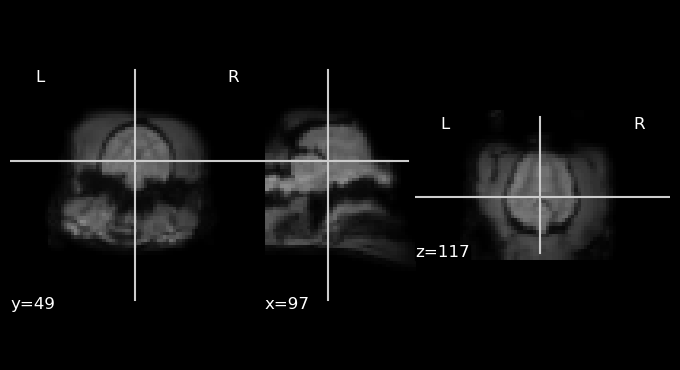

In [5]:
x = 97
y = 49
z = 117

plot_anat(mean_fct_file, display_mode='ortho', cut_coords=[x,y,z])

In [ ]:
#@title
col1 = widgets.VBox([widgets.IntSlider(min=minXD, max=maxXD, step=1, value=iniXD, description='X in dog'),
                    widgets.IntSlider(min=minYD, max=maxYD, step=1, value=iniYD, description='Y in dog'),
                    widgets.IntSlider(min=minZD, max=maxZD, step=1, value=iniZD, description='Z in dog')])
out = widgets.interactive_output(plotBrain, {'xD':col1.children[0], 'yD':col1.children[1], 'zD':col1.children[2], 
                                'xH':col2.children[0], 'yH':col2.children[1], 'zH':col2.children[2]})

display(widgets.HBox([col1, col2]), out)

In [ ]:
def motion_correction(workingdir, reoriented_file):
    '''
    The function receives a 4D image, calculates the movement using mcflirt. 
    Generates a par file with the movement parameters and a motion corrected 4D image.
    workingdir: working directory
    reoriented_file: 4D image
    '''
    # motion correction
    command = f"mcflirt -in {workingdir + os.sep + reoriented_file} -out {workingdir + os.sep + reoriented_file[:-7] + '_mc.nii.gz'} -report -plots"
    os.system(command)

    # rename par file
    os.rename(workingdir + os.sep + reoriented_file[:-7] + '_mc.nii.gz.par', workingdir + os.sep + reoriented_file[:-18] + '.par')

runs_possible = [1,2,3,4]
base_run = 1 # run used as reference to align all the others


#for run_N in runs_possible:



In [90]:
maxX

80

In [78]:
workingdir + os.sep + filename[:-7] + '_mc.nii.gz'

'P:\\userdata\\raulh87\\data\\Complex\\preprocessing\\D-sub-001\\D-sub-001_task-visual_run-01_mc.nii.gz'

In [ ]:
from nilearn import plotting
from nilearn import image as nli


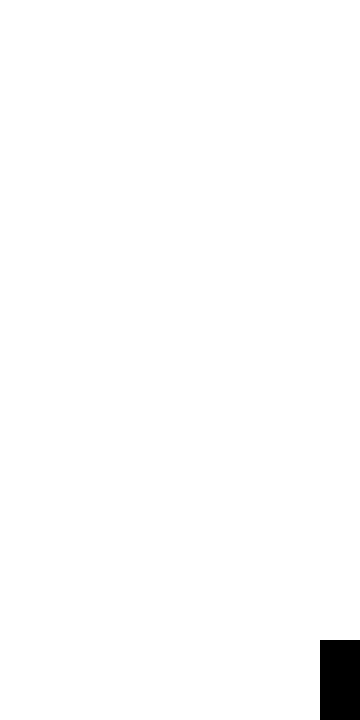
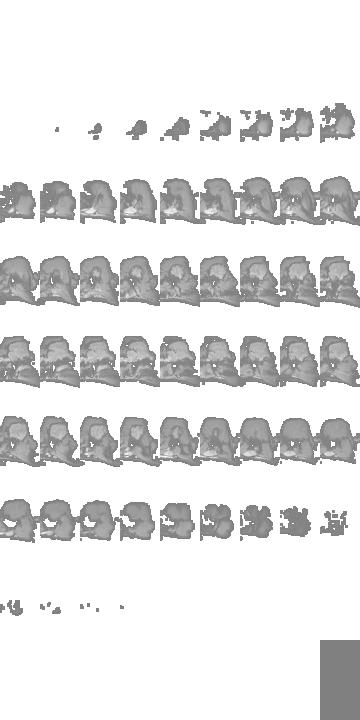

In [66]:
# load reoriented file
img = nli.mean_img(workingdir + os.sep + reoriented_file)
# plot reoriented file
plotting.view_img(img, bg_img=False, cmap='gray', colorbar=False, annotate=True)


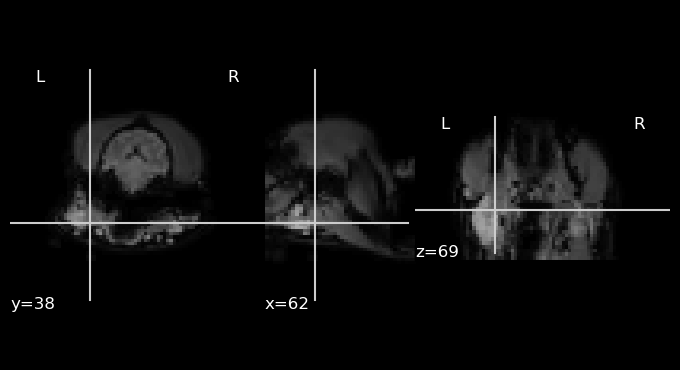

In [69]:
display =plotting.plot_anat(img, display_mode='ortho', 
                   draw_cross=True, 
                   annotate=True,
                   black_bg=True) 

display.annotate


P:\userdata\raulh87\data\Complex\preprocessing\D-sub-001\D-sub-001_task-visual_run-01_reoriented.nii.gz


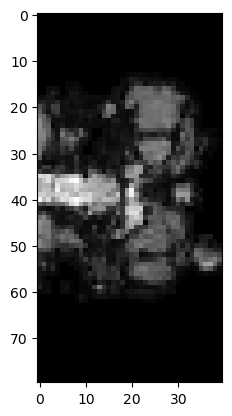

In [56]:
import nibabel as nib
import matplotlib.pyplot as plt

filename = workingdir + os.sep + reoriented_file
print(filename)

# load the image
img = nib.load(filename)

# get the data
data = img.get_fdata()

# Display a slice
plt.imshow(data[:,:,40,0], cmap='gray')


In [ ]:
def reorient_file(input_file, output_file, combination):
    # This function reorients the input file using fsl and the combination of rotations
    """"
    input_file: str, path to the input file
    output_file: str, path to the output file
    combination: list of strings, combination of rotations to apply (e.g. ['-x', 'z', '-y'])
    """
    print('Working with ' + input_file)
    # create copy of input file to output file
    print('Creating ' + output_file + '...')
    shutil.copyfile(input_file, output_file)
    
    # delete orientation
    print('Deleting orientation...')
    command = f"fslorient -deleteorient {output_file}"
    os.system(command)
    # swap axes
    print('Swapping axes...')
    command = f"fslswapdim {output_file} {combination[0]} {combination[1]} {combination[2]} {output_file}"
    os.system(command)
    # adding labels
    print('Adding labels...')
    command = f"fslorient -setqformcode 1 {output_file}"

    

In [69]:
## determine input file and output directory ## 

# input directory in BIDS format
filename = datafolder + os.sep + dataset + os.sep + specie + '-sub-' + str(sub_N).zfill(3) + os.sep + 'func' + os.sep
# check if session is not empty
if session != '':
    filename += 'ses-' + session + os.sep
filename += specie + '-sub-' + str(sub_N).zfill(3)
if session != '':
    filename += '_ses-' + session
filename += '_task-' + task + '_run-' + str(run_N).zfill(2) + '_bold.nii.gz'

# create output directory, where the fsl output will be saved (preprocessed data)
outputdir = datafolder + os.sep + dataset + os.sep + 'preprocessing' + os.sep + specie + '-sub-' + str(sub_N).zfill(3)
# check if session is not empty
if session != '':
    outputdir += '_ses-' + session
outputdir += '_task-' + task + '_run-' + str(run_N).zfill(2)

## Filling out the design.fsf file ##
# create list of labels to fill in the design.fsf file
label_list = ['Outputdir', 'TR', 'Volumes', 'BET', 'Smooth', 'Input']

# create dictionary to fill in the design.fsf file
to_fill_dict = dict()
for label in label_list:
    to_fill_dict[label] = dict()
    if label == 'Outputdir':
        to_fill_dict[label]['string_to_find'] = 'set fmri(outputdir)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(outputdir) "' + outputdir + '"')
    elif label == 'TR':
        to_fill_dict[label]['string_to_find'] = 'set fmri(tr)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(tr) ' + str(TR))
    elif label == 'Volumes':
        to_fill_dict[label]['string_to_find'] = 'set fmri(npts)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(npts) ' + str(volumes))
    elif label == 'BET':
        to_fill_dict[label]['string_to_find'] = 'set fmri(bet_yn)'
        if specie == 'H':
            to_fill_dict[label]['string_to_replace'] = ('set fmri(bet_yn) 1')
        elif specie == 'D':
            to_fill_dict[label]['string_to_replace'] = ('set fmri(bet_yn) 0')
    elif label == 'Smooth':
        to_fill_dict[label]['string_to_find'] = 'set fmri(smooth)'
        to_fill_dict[label]['string_to_replace'] = ('set fmri(smooth) ' + str(smooth))
    elif label == 'Input':
        to_fill_dict[label]['string_to_find'] = 'set feat_files(1)'
        to_fill_dict[label]['string_to_replace'] = ('set feat_files(1) "' + filename + '"')
        



    


In [74]:
design_path = os.path.join(os.getcwd(), 'FSL_designs\\preprocess.fsf')
design_modified_path = os.path.join(os.getcwd(), 'FSL_designs\\preprocess_modified.fsf')

utils.fill_fsf(to_fill_dict, design_path, design_modified_path)


In [89]:
import shutil

In [101]:
runs_possible = range(1,7)

dataset = 'Complex'
session = ''
specie = 'H'
task = 'visual'

if specie == 'H':
    sublist = ['Raul','Laura','Juan','Miriam','Paula','Cecilia','Lili','Rita','Eszter','Yago','Andrea','John','Eniko']
elif specie == 'D':
    sublist = ['Odin','Kun','Maya','Maverick','Mokka','Alma','Akira','Pan','Monty','Kara','Bodza','Grog','Bingo','Rohan','Nara']


for sub_N,participant in enumerate(sublist):
    if participant == 'Maverick':
        runs_possible = range(1,4)
    elif participant == 'Grog':
        runs_possible = range(1,4)
    else:
        runs_possible = range(1,7)
    for run_N in runs_possible:
        original_name = os.getcwd() + os.sep + participant + '_' + 'run' + str(run_N) + '.nii.gz'

        # input directory in BIDS format
        filename = datafolder + os.sep + dataset + os.sep + specie + '-sub-' + str(sub_N+1).zfill(3) + os.sep + 'func' + os.sep
        # check if session is not empty
        if session != '':
            filename += 'ses-' + session + os.sep
        filename += specie + '-sub-' + str(sub_N+1).zfill(3)
        if session != '':
            filename += '_ses-' + session
        filename += '_task-' + task + '_run-' + str(run_N).zfill(2) + '_bold.nii.gz'
        # check if folder related to filename exist
        if not os.path.exists(os.path.dirname(filename)):
            os.makedirs(os.path.dirname(filename))

        print('old name:' + original_name)
        print('new name:' + filename)
        # create a copy of filename to new location
        shutil.copy(original_name, filename)


    


old name:C:\Users\raul_\Desktop\complex\Raul_run1.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-01_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Raul_run2.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-02_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Raul_run3.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-03_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Raul_run4.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-04_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Raul_run5.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-05_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Raul_run6.nii.gz
new name:C:\data\Complex\H-sub-001\func\H-sub-001_task-visual_run-06_bold.nii.gz
old name:C:\Users\raul_\Desktop\complex\Laura_run1.nii.gz
new name:C:\data\Complex\H-sub-002\func\H-sub-002_task-visual_run-01_bold.nii.gz
old name:C:\Users\raul_\Desktop\c